# Insecticide usage trends in California Pesticide Use Reports
## 1990 - 2016

#### 1) Combine data into one file
cat */udc*txt > pur_1990_2016.txt

#### 2) Copy a header line and then remove all the headers (then add one back in)
grep -v use_no,prodno,chem_code pur_1990_2016.txt

In [ ]:
import csv

### Remove extra white space in elements
with open('pur_1990_2016.txt_noheaders') as f:
    reader = csv.reader(f)
    for row in reader:
        row = [r.strip() for r in row]
        print(",".join(row))
        # > pur_1990_2016.txt_noheaders_nowhitespace

# At this point you get errors when trying to input the data as a dataframe.
### There appears to be misformated rows and rows with missing data (e.g. no chemical code)

In [8]:
# print out rows with no chem_code
f = open("no_chem_code.csv", "w")

for line in open("pur_1990_2016.txt_noheaders_nowhitespace"):
    i=line.strip().split(",")
    if i[2] == "":   # position of chem_code
        f.write("".join([line.strip(),'\n']))
        #print line.strip() # > no_chem_code.csv
f.close()


In [4]:
# Show submissions with no chem code by year. Its about 17% of the total each year.
D = {}
total = 0
for line in open("no_chem_code.csv"):
    i=line.strip().split(",")
    yr = i[13].split('/')[-1]
    if yr == '':
        continue

    if yr not in D:
        D[yr]=0
    D[yr]+=1 
    total += 1
for year in sorted(D.keys()):
    print(year, D[year])

print('total', total)

2001 85
2002 235
2003 439570
2004 434859
2005 468174
2006 497628
2007 466322
2008 458121
2009 454936
2010 529448
2011 575894
2012 605906
2013 662104
2014 689913
2015 739172
2016 797361
total 7819728


In [ ]:

D = {}
total = 0
for line in open("pur_1990_2016.txt_noheaders_nowhitespace"):
    i=line.strip().split(",")

    yr = i[13].split('/')[-1]
    if yr == '':
        continue # yes some applications have no year.

    if yr not in D:
        D[yr]=0
    D[yr]+=1
    total += 1

    
for year in D:
    print(year, D[year])

print('total', total)



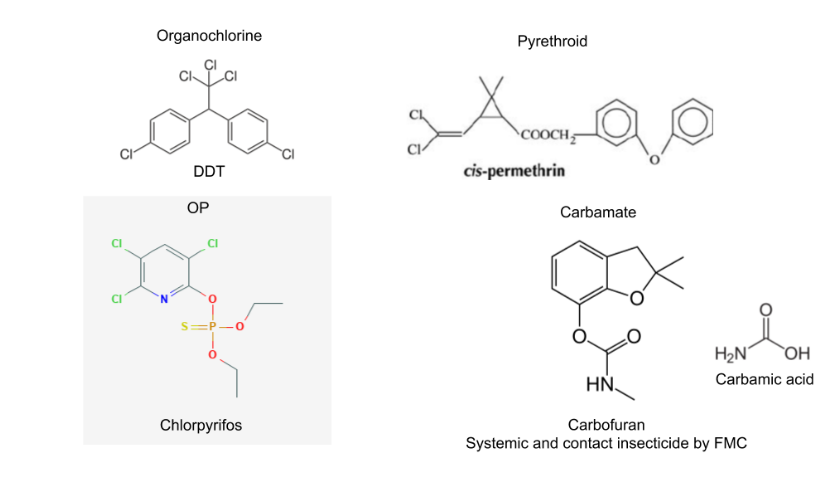

In [3]:
%matplotlib inline

import matplotlib.pyplot as plt
import matplotlib.image as mpimg
image = mpimg.imread("ochem.png")
plt.figure(num=None, figsize=(16, 8), dpi=80)
plt.axis('off')

plt.imshow(image)
plt.show()



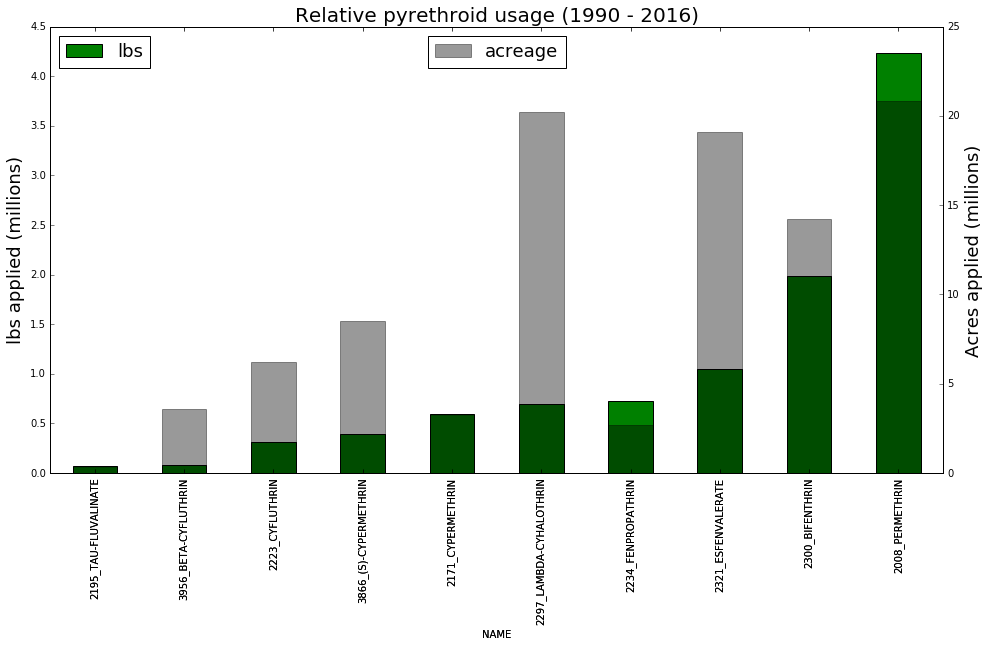

In [72]:
#pyrethroid barplot
import math
import pandas as pd
import matplotlib.pyplot as P
import numpy as np
import sys
%matplotlib inline

#create figures
fig1 = P.figure(num=None, figsize=(16, 8), dpi=80, facecolor='w', edgecolor='k')
ax1 = fig1.add_subplot(111)
#ax2 = fig2.add_subplot(111)
ax2 = fig1.add_subplot(111, sharex=ax1, frameon=False)
ax2.yaxis.tick_right()
ax2.yaxis.set_label_position("right")
ax1.yaxis.tick_left()
ax1.yaxis.set_label_position("left")

# chem name dict
D={}
for line in open("chem_key2.txt"):
    i=line.strip().split(';')
    if i[0]=="CHEM_CODE":
        continue
    if len(i)==2:
        D[int(i[0])]=i[1]


pyr_df = pd.read_table("pyr_yr_mo.data",delimiter=";")
pyr_df.columns = ['yr', 'mo', 'chem','unit',"application#","amounts","total_acres","unit_lbs","applic_#",'amounts2','total_lbs']
# join chem_ID and name for display
pyr_df["NAME"] = pyr_df["chem"].astype(str).str.cat(pyr_df['chem'].map(D), sep='_')
# Limit to 1990 and beyond
pyr_df = pyr_df.loc[pyr_df['yr']>1989]

pyr_df = pyr_df.groupby('NAME').sum()

pyr_df['lbs'] = pyr_df['total_lbs'] / 1000000 # make human readable
pyr_df = pyr_df.loc[pyr_df['lbs']>.01] # Filter out low use chemicals

pyr_df['acreage'] = pyr_df['total_acres'] / 1000000 # make human readable


pyr_sorted_df = pyr_df.sort_values(by=['lbs'])
pyr_sorted_df = pyr_sorted_df.reset_index()

pyr_sorted_df.plot(kind='bar',x='NAME',y='lbs', ax=ax1, color='green')
pyr_sorted_df.plot(kind='bar',x='NAME',y='acreage', ax=ax2, color='k', alpha=.4)
ax2.legend(loc=9, fontsize=18)
ax1.legend(loc=2, fontsize=18)
ax2.set_ylabel("Acres applied (millions)", fontsize=18)
ax1.set_ylabel("lbs applied (millions)", fontsize=18)
P.title("Relative pyrethroid usage (1990 - 2016)", fontsize=20)

P.show()

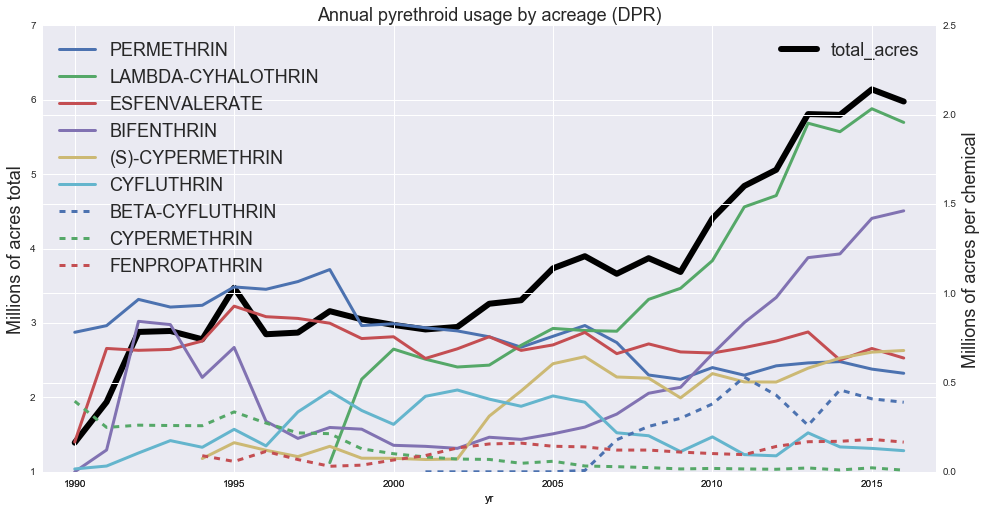

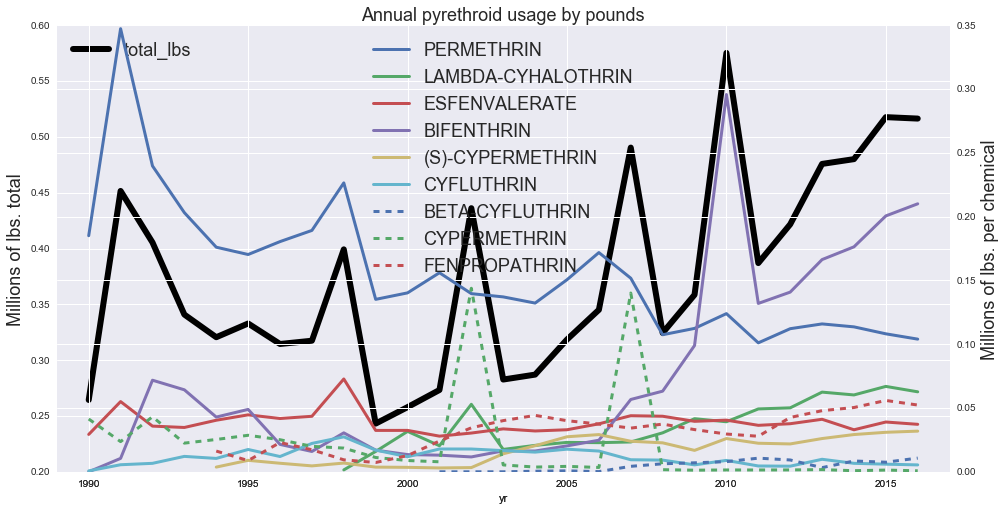

In [82]:
#Pyrethroids 
import math
import matplotlib.pyplot as P
import numpy as np
import sys
import pandas as pd
import seaborn as sns
%matplotlib inline

#create figures
fig1 = P.figure(num=None, figsize=(16, 8), dpi=80, facecolor='w', edgecolor='k')
fig2 = P.figure(num=None, figsize=(16, 8), dpi=80, facecolor='w', edgecolor='k')


# chemical code dictionary
code_D={}
for line in open("chem_key2.txt"):
    i=line.strip().split(';')
    if len(i)==2:
        code_D[i[0]]=i[1]
        



pyr_df = pd.read_table("pyr_yr_mo.data",delimiter=";")
pyr_df.columns = ['yr', 'mo', 'chem','unit',"application#","amounts","total_acres","unit_lbs","applic_#",'amounts2','total_lbs']
#chlorpyr=df.loc[df['chem']==253].groupby('yr').sum()


total = pyr_df.groupby('yr').sum()
total = total.reset_index()
total = total.loc[total['yr']>=1990]
#change units to /Million
total['acre_M'] = total['total_acres']/1000000
total['lbs_M'] = total['total_lbs']/1000000

# subplot 1 populated with acreage data 
ax1 = fig1.add_subplot(111)
total.plot(kind='line',x='yr',y='acre_M', color='k', ax=ax1,lw=6, label="total_acres")

# subplot 2 populated with lb data 
ax3 = fig2.add_subplot(111)
total.plot(kind='line',x='yr',y='lbs_M', color='k', ax=ax3,lw=6, label="total_lbs")

#P.ylabel("lbs total",fontsize=18)

# now, the second axes that shares the x-axis with the ax1
ax2 = fig1.add_subplot(111, sharex=ax1, frameon=False)
ax4 = fig2.add_subplot(111, sharex=ax3, frameon=False)

#Here is a list of the top 9 pyr
keep = [2008,2297,2321,2300,3866,2223,3956,2171,2234]

count=0
for chem in keep:
    count+=1
    pyr=pyr_df.loc[pyr_df['chem']==chem].groupby('yr').sum()
    #chlorpyr['fresh_ID']=chem
    pyr = pyr.reset_index()
    pyr = pyr.loc[pyr['yr']>=1990]
    pyr['acre_M'] = pyr['total_acres']/1000000
    pyr['lbs_M'] = pyr['total_lbs']/1000000


    if count>6: # add linestyle so colorspace doesn't overlap
        pyr.plot(kind='line',x='yr',y='acre_M', ax=ax2,lw=3, linestyle='--',label=code_D[str(chem)])
        pyr.plot(kind='line',x='yr',y='lbs_M', ax=ax4,lw=3, linestyle='--',label=code_D[str(chem)])

    else:
        pyr.plot(kind='line',x='yr',y='acre_M', ax=ax2,lw=3, linestyle='-',label=code_D[str(chem)])
        pyr.plot(kind='line',x='yr',y='lbs_M', ax=ax4,lw=3, linestyle='-',label=code_D[str(chem)])

    ax2.yaxis.tick_right()
    ax2.yaxis.set_label_position("right")

    ax4.yaxis.tick_right()
    ax4.yaxis.set_label_position("right")
    
# set labels
ax1.set_title("Annual pyrethroid usage by acreage (DPR)",fontsize=18)
ax3.set_title("Annual pyrethroid usage by pounds",fontsize=18)
ax1.set_ylabel("Millions of acres total",fontsize=18)
ax2.set_ylabel("Millions of acres per chemical",fontsize=18)
ax3.set_ylabel("Millions of lbs. total",fontsize=18)
ax4.set_ylabel("Millions of lbs. per chemical",fontsize=18)

ax1.set_xlim(1989,2017)
ax3.set_xlim(1989,2017)
ax1.legend(loc=1,fontsize=18)
ax2.legend(loc=2,fontsize=18)
ax3.legend(loc=2,fontsize=18)
ax4.legend(loc=9,fontsize=18)
P.show()

## lambda-cyhalothrin is a mixture of isomers of cyhalothrin
## Syngenta held the patent for lambda-cyhalothrin which expired in most major markets in 2003.
## moderate toxicity at LD50 79mb/kg (below 50 is highly toxic)

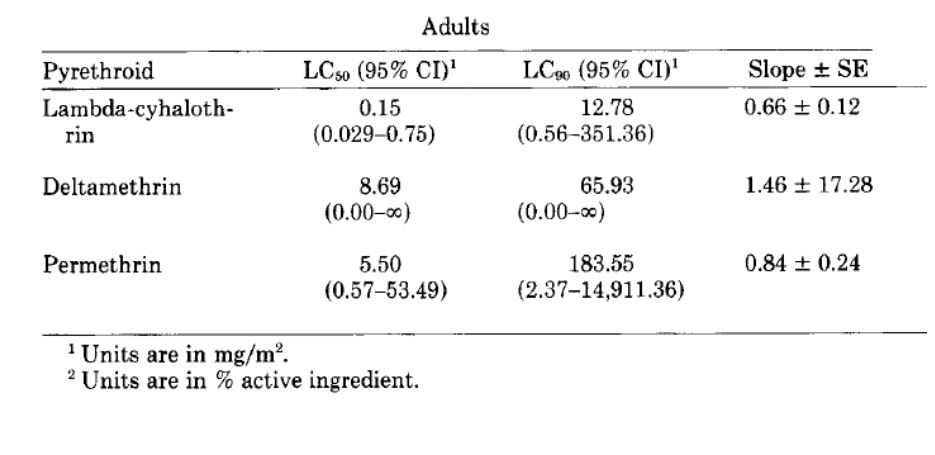

In [153]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
image = mpimg.imread("cyhalothrin.png")
P.figure(num=None, figsize=(16, 8), dpi=80)
P.axis('off')

plt.imshow(image)
plt.show()

#Sulaiman et al. 1991 (from Malaysia)
# Ae. albopictus adults

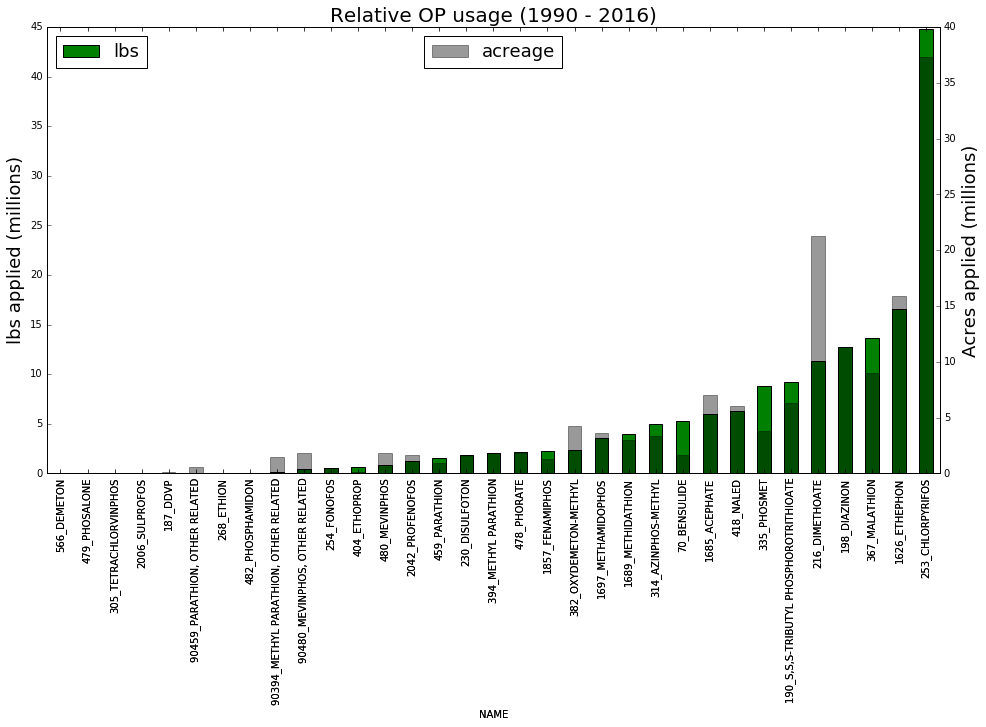

In [73]:
#Organophosphate barplot
import math
import pandas as pd
import matplotlib.pyplot as P
import numpy as np
import sys
%matplotlib inline

#create figures
fig1 = P.figure(num=None, figsize=(16, 8), dpi=80, facecolor='w', edgecolor='k')
ax1 = fig1.add_subplot(111)
#ax2 = fig2.add_subplot(111)
ax2 = fig1.add_subplot(111, sharex=ax1, frameon=False)
ax2.yaxis.tick_right()
ax2.yaxis.set_label_position("right")
ax1.yaxis.tick_left()
ax1.yaxis.set_label_position("left")

# chem name dict
D={}
for line in open("chem_key2.txt"):
    i=line.strip().split(';')
    if i[0]=="CHEM_CODE":
        continue
    if len(i)==2:
        D[int(i[0])]=i[1]


pyr_df = pd.read_table("OP_yr_mo.data",delimiter=";")
pyr_df.columns = ['yr', 'mo', 'chem','unit',"application#","amounts","total_acres","unit_lbs","applic_#",'amounts2','total_lbs']
# join chem_ID and name for display
pyr_df["NAME"] = pyr_df["chem"].astype(str).str.cat(pyr_df['chem'].map(D), sep='_')
# Limit to 1990 and beyond
pyr_df = pyr_df.loc[pyr_df['yr']>1989]

pyr_df = pyr_df.groupby('NAME').sum()

pyr_df['lbs'] = pyr_df['total_lbs'] / 1000000 # make human readable
pyr_df = pyr_df.loc[pyr_df['lbs']>.01] # Filter out low use chemicals

pyr_df['acreage'] = pyr_df['total_acres'] / 1000000 # make human readable


pyr_sorted_df = pyr_df.sort_values(by=['lbs'])
pyr_sorted_df = pyr_sorted_df.reset_index()

pyr_sorted_df.plot(kind='bar',x='NAME',y='lbs', ax=ax1, color='green')
pyr_sorted_df.plot(kind='bar',x='NAME',y='acreage', ax=ax2, color='k', alpha=.4)
ax2.legend(loc=9, fontsize=18)
ax1.legend(loc=2, fontsize=18)
ax2.set_ylabel("Acres applied (millions)", fontsize=18)
ax1.set_ylabel("lbs applied (millions)", fontsize=18)
P.title("Relative OP usage (1990 - 2016)", fontsize=20)

P.show()

In [ ]:
# To do: Plot a given chemical as a percent of total pyr or OP used over time.

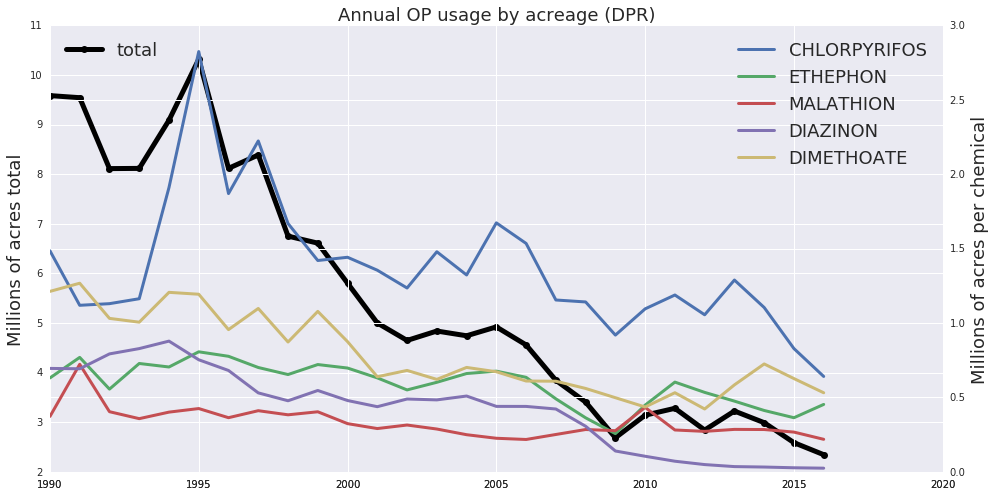

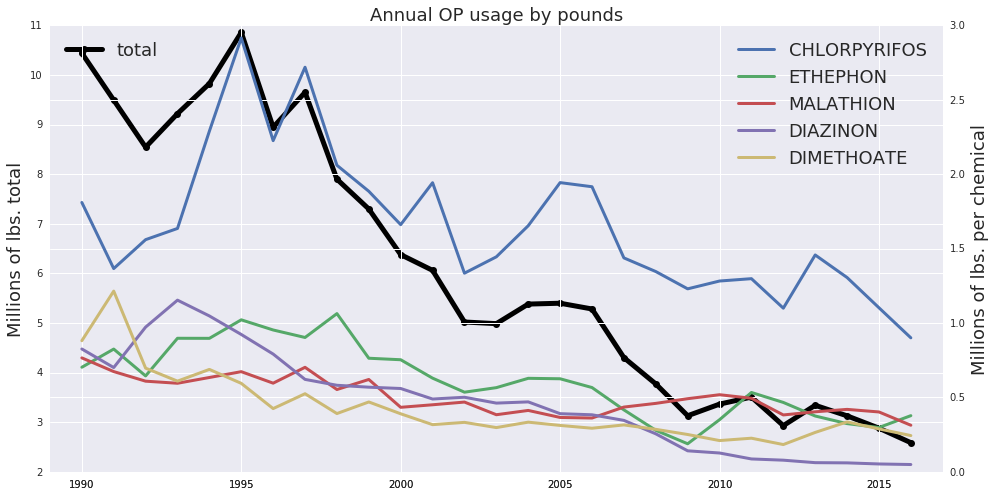

In [94]:
#Organophosphates 
import math
import matplotlib.pyplot as P
import numpy as np
import sys
import pandas as pd
import seaborn as sns
%matplotlib inline

#create figures
fig1 = P.figure(num=None, figsize=(16, 8), dpi=80, facecolor='w', edgecolor='k')
fig2 = P.figure(num=None, figsize=(16, 8), dpi=80, facecolor='w', edgecolor='k')


# chemical code dictionary
code_D={}
for line in open("chem_key2.txt"):
    i=line.strip().split(';')
    if len(i)==2:
        code_D[i[0]]=i[1]
        
#Here is a list of the top 10 OPs
#keep = [253,1626,367,198,216,190,335,418,1685,70]
#Here is a list of the top 5 OPs
keep = [253,1626,367,198,216]

df = pd.read_table("OP_yr_mo.data",delimiter=";")
df.columns = ['yr', 'mo', 'chem','unit',"application#","amounts","total_acres","unit_lbs","applic_#",'amounts2','total_lbs']
#chlorpyr=df.loc[df['chem']==253].groupby('yr').sum()


total = df.groupby('yr').sum()
total = total.reset_index()
total = total.loc[total['yr']>=1990]
xlist = total['yr'].tolist()
acre_list = total['total_acres'].tolist()
lbs_list = total['total_lbs'].tolist()
#change units to /Million
acre_list = [x/1000000 for x in acre_list]
lbs_list = [x/1000000 for x in lbs_list]

# and the first axes using subplot populated with data 
ax1 = fig1.add_subplot(111)
line1 = ax1.plot(xlist,acre_list, 'ko-',label='total',lw=5)


# and the first axes using subplot populated with data 
ax3 = fig2.add_subplot(111)
line2 = ax3.plot(xlist,lbs_list, 'ko-',label='total',lw=5)
P.ylabel("lbs total",fontsize=18)

# now, the second axes that shares the x-axis with the ax1
ax2 = fig1.add_subplot(111, sharex=ax1, frameon=False)
ax4 = fig2.add_subplot(111, sharex=ax3, frameon=False)


for chem in keep:
    chlorpyr=df.loc[df['chem']==chem].groupby('yr').sum()
    chlorpyr['fresh_ID']=chem
    chlorpyr = chlorpyr.reset_index()
    chlorpyr = chlorpyr.loc[chlorpyr['yr']>=1990]
    xlist = chlorpyr['yr'].tolist()
    lbs_list = chlorpyr['total_lbs'].tolist()
    acre_list = chlorpyr['total_acres'].tolist()
    #change units to /Million
    acre_list = [x/1000000 for x in acre_list]
    lbs_list = [x/1000000 for x in lbs_list]

    ax2.plot(xlist,acre_list,label=code_D[str(chem)],lw=3)
    ax2.yaxis.tick_right()
    ax2.yaxis.set_label_position("right")

    ax4.plot(xlist,lbs_list,label=code_D[str(chem)],lw=3)
    ax4.yaxis.tick_right()
    ax4.yaxis.set_label_position("right")
    
# set labels
ax1.set_title("Annual OP usage by acreage (DPR)",fontsize=18)
ax3.set_title("Annual OP usage by pounds",fontsize=18)
ax1.set_ylabel("Millions of acres total",fontsize=18)
ax2.set_ylabel("Millions of acres per chemical",fontsize=18)
ax3.set_ylabel("Millions of lbs. total",fontsize=18)
ax4.set_ylabel("Millions of lbs. per chemical",fontsize=18)

P.xlim(1989,2017)
ax1.legend(loc=2,fontsize=18)
ax2.legend(loc=1,fontsize=18)
ax3.legend(loc=2,fontsize=18)
ax4.legend(loc=1,fontsize=18)
P.show()

## Chlorpyrifos = a product of Dow Agrosciences
## registered for use in the US since 1965


In [ ]:
# CARBAMATES

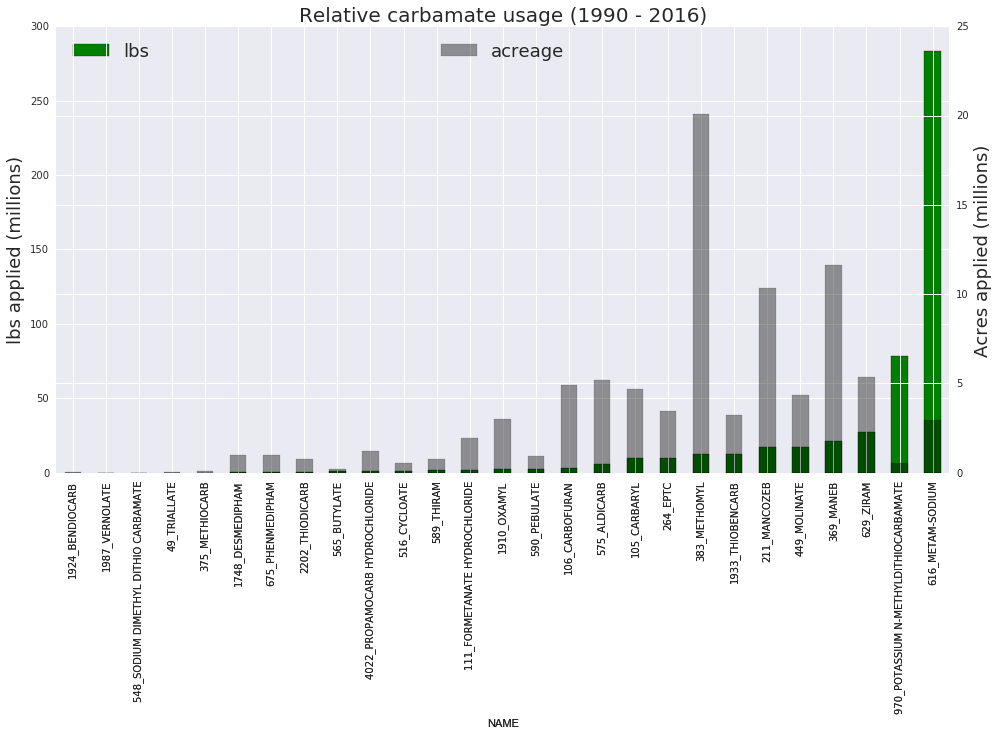

In [93]:
#Carbamate barplot
import math
import pandas as pd
import matplotlib.pyplot as P
import numpy as np
import sys
%matplotlib inline

#create figures
fig1 = P.figure(num=None, figsize=(16, 8), dpi=80, facecolor='w', edgecolor='k')
ax1 = fig1.add_subplot(111)
ax2 = fig1.add_subplot(111, sharex=ax1, frameon=False)
ax2.yaxis.tick_right()
ax2.yaxis.set_label_position("right")
ax1.yaxis.tick_left()
ax1.yaxis.set_label_position("left")

# chem name dict
D={}
for line in open("chem_key2.txt"):
    i=line.strip().split(';')
    if i[0]=="CHEM_CODE":
        continue
    if len(i)==2:
        D[int(i[0])]=i[1]


pyr_df = pd.read_table("carb_yr_mo.data",delimiter=";")
pyr_df.columns = ['yr', 'mo', 'chem','unit',"application#","amounts","total_acres","unit_lbs","applic_#",'amounts2','total_lbs']
# join chem_ID and name for display
pyr_df["NAME"] = pyr_df["chem"].astype(str).str.cat(pyr_df['chem'].map(D), sep='_')
# Limit to 1990 and beyond
pyr_df = pyr_df.loc[pyr_df['yr']>1989]

pyr_df = pyr_df.groupby('NAME').sum()

pyr_df['lbs'] = pyr_df['total_lbs'] / 1000000 # make human readable
pyr_df = pyr_df.loc[pyr_df['lbs']>.01] # Filter out low use chemicals

pyr_df['acreage'] = pyr_df['total_acres'] / 1000000 # make human readable


pyr_sorted_df = pyr_df.sort_values(by=['lbs'])
pyr_sorted_df = pyr_sorted_df.reset_index()

# get a list of sorted chem names (the previous chem column was summed)
# new_chem = pyr_sorted_df["NAME"].str.split("_", n = 1, expand = True) 
# pyr_sorted_df['fresh_code']=new_chem[0]
# sorted_chem = pyr_sorted_df['fresh_code'].tolist()
# sorted_chem.reverse()
# sorted_chem = [int(x) for x in sorted_chem]
# print(sorted_chem)

pyr_sorted_df.plot(kind='bar',x='NAME',y='lbs', ax=ax1, color='green')
pyr_sorted_df.plot(kind='bar',x='NAME',y='acreage', ax=ax2, color='k', alpha=.4)
ax2.legend(loc=9, fontsize=18)
ax1.legend(loc=2, fontsize=18)
ax2.set_ylabel("Acres applied (millions)", fontsize=18)
ax1.set_ylabel("lbs applied (millions)", fontsize=18)
P.title("Relative carbamate usage (1990 - 2016)", fontsize=20)

P.show()

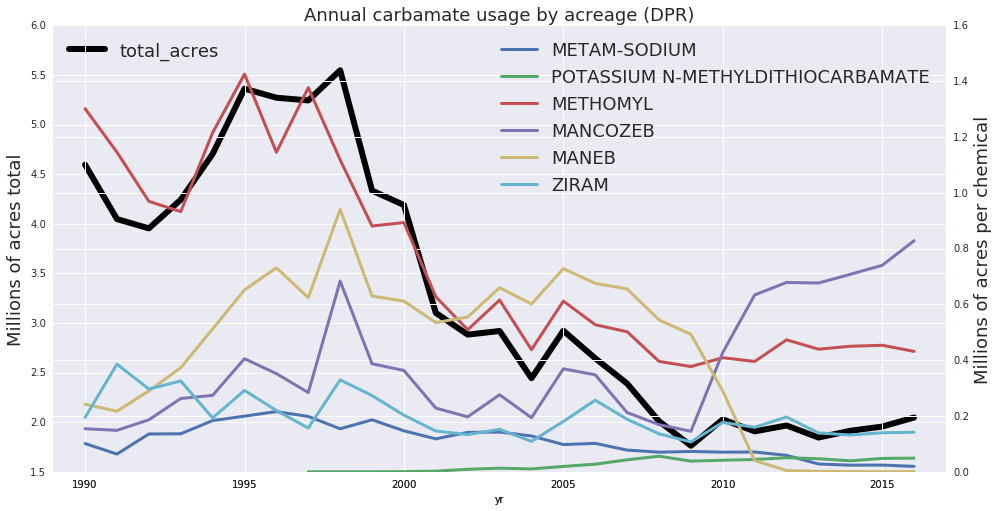

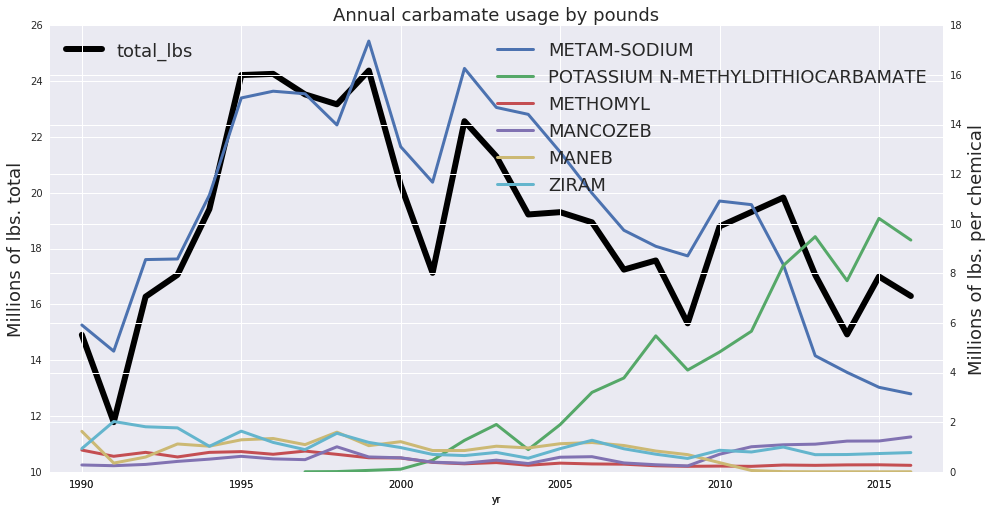

In [92]:
#Carbamates 
import math
import matplotlib.pyplot as P
import numpy as np
import sys
import pandas as pd
import seaborn as sns
%matplotlib inline

#create figures
fig1 = P.figure(num=None, figsize=(16, 8), dpi=80, facecolor='w', edgecolor='k')
fig2 = P.figure(num=None, figsize=(16, 8), dpi=80, facecolor='w', edgecolor='k')


# chemical code dictionary
code_D={}
for line in open("chem_key2.txt"):
    i=line.strip().split(';')
    if len(i)==2:
        code_D[i[0]]=i[1]
        



carb_df = pd.read_table("carb_yr_mo.data",delimiter=";")
carb_df.columns = ['yr', 'mo', 'chem','unit',"application#","amounts","total_acres","unit_lbs","applic_#",'amounts2','total_lbs']
#chlorpyr=df.loc[df['chem']==253].groupby('yr').sum()


total = carb_df.groupby('yr').sum()
total = total.reset_index()
total = total.loc[total['yr']>=1990]
#change units to /Million
total['acre_M'] = total['total_acres']/1000000
total['lbs_M'] = total['total_lbs']/1000000

# subplot 1 populated with acreage data 
ax1 = fig1.add_subplot(111)
total.plot(kind='line',x='yr',y='acre_M', color='k', ax=ax1,lw=6, label="total_acres")

# subplot 2 populated with lb data 
ax3 = fig2.add_subplot(111)
total.plot(kind='line',x='yr',y='lbs_M', color='k', ax=ax3,lw=6, label="total_lbs")

#P.ylabel("lbs total",fontsize=18)

# now, the second axes that shares the x-axis with the ax1
ax2 = fig1.add_subplot(111, sharex=ax1, frameon=False)
ax4 = fig2.add_subplot(111, sharex=ax3, frameon=False)

#keep = [616, 970, 629, 369, 449, 211, 1933, 383, 264, 105, 575, 106, 590, 1910, 111, 589, 516, 4022, 565, 2202, 675, 1748, 375, 49, 548, 1987, 1924]
# keep the important players only
keep = [616,970,383,211,369,629]
count=0
#for chem in keep:
for chem in keep:
    count+=1
    carb=carb_df.loc[carb_df['chem']==chem].groupby('yr').sum()
    #chlorpyr['fresh_ID']=chem
    carb = carb.reset_index()
    carb = carb.loc[carb['yr']>=1990]
    carb['acre_M'] = carb['total_acres']/1000000
    carb['lbs_M'] = carb['total_lbs']/1000000

    carb.plot(kind='line',x='yr',y='acre_M', ax=ax2,lw=3, linestyle='-',label=code_D[str(chem)])
    carb.plot(kind='line',x='yr',y='lbs_M', ax=ax4,lw=3, linestyle='-',label=code_D[str(chem)])

        
    #ax2.plot(xlist,acre_list,label=code_D[str(chem)],lw=3)
    ax2.yaxis.tick_right()
    ax2.yaxis.set_label_position("right")

    #ax4.plot(xlist,lbs_list,label=code_D[str(chem)],lw=3)
    ax4.yaxis.tick_right()
    ax4.yaxis.set_label_position("right")
    
# set labels
ax1.set_title("Annual carbamate usage by acreage (DPR)",fontsize=18)
ax3.set_title("Annual carbamate usage by pounds",fontsize=18)
ax1.set_ylabel("Millions of acres total",fontsize=18)
ax2.set_ylabel("Millions of acres per chemical",fontsize=18)
ax3.set_ylabel("Millions of lbs. total",fontsize=18)
ax4.set_ylabel("Millions of lbs. per chemical",fontsize=18)

ax1.set_xlim(1989,2017)
ax3.set_xlim(1989,2017)
ax1.legend(loc=2,fontsize=18)
ax2.legend(loc=1,fontsize=18)
ax3.legend(loc=2,fontsize=18)
ax4.legend(loc=1,fontsize=18)
P.show()

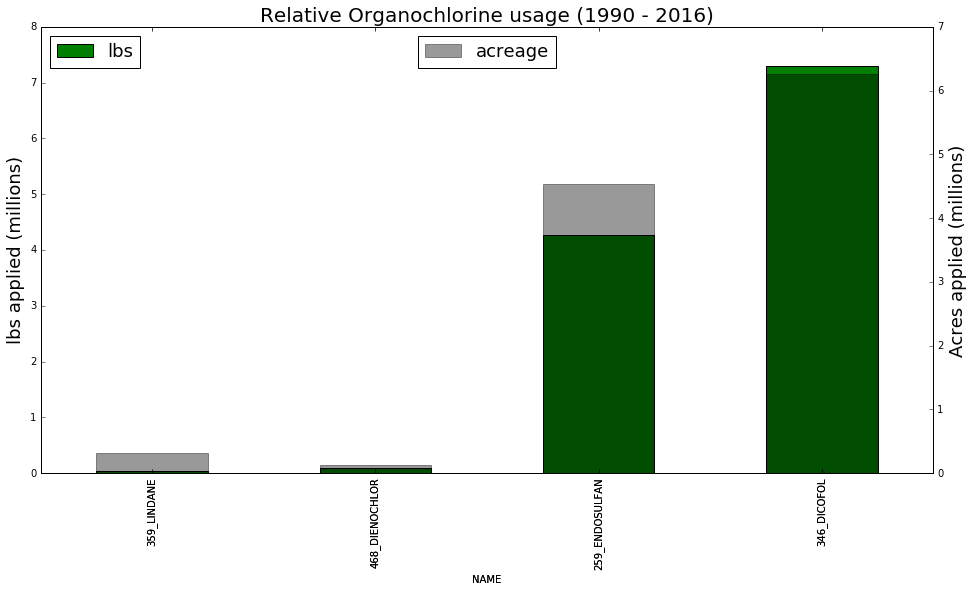

In [7]:
#Carbamate barplot
import math
import pandas as pd
import matplotlib.pyplot as P
import numpy as np
import sys
%matplotlib inline

#create figures
fig1 = P.figure(num=None, figsize=(16, 8), dpi=80, facecolor='w', edgecolor='k')
ax1 = fig1.add_subplot(111)
ax2 = fig1.add_subplot(111, sharex=ax1, frameon=False)
ax2.yaxis.tick_right()
ax2.yaxis.set_label_position("right")
ax1.yaxis.tick_left()
ax1.yaxis.set_label_position("left")

# chem name dict
D={}
for line in open("chem_key2.txt"):
    i=line.strip().split(';')
    if i[0]=="CHEM_CODE":
        continue
    if len(i)==2:
        D[int(i[0])]=i[1]


pyr_df = pd.read_table("OC_yr_mo.data",delimiter=";")
pyr_df.columns = ['yr', 'mo', 'chem','unit',"application#","amounts","total_acres","unit_lbs","applic_#",'amounts2','total_lbs']
# join chem_ID and name for display
pyr_df["NAME"] = pyr_df["chem"].astype(str).str.cat(pyr_df['chem'].map(D), sep='_')
# Limit to 1990 and beyond
pyr_df = pyr_df.loc[pyr_df['yr']>1989]

pyr_df = pyr_df.groupby('NAME').sum()

pyr_df['lbs'] = pyr_df['total_lbs'] / 1000000 # make human readable
pyr_df = pyr_df.loc[pyr_df['lbs']>.01] # Filter out low use chemicals

pyr_df['acreage'] = pyr_df['total_acres'] / 1000000 # make human readable


pyr_sorted_df = pyr_df.sort_values(by=['lbs'])
pyr_sorted_df = pyr_sorted_df.reset_index()

# get a list of sorted chem names (the previous chem column was summed)
# new_chem = pyr_sorted_df["NAME"].str.split("_", n = 1, expand = True) 
# pyr_sorted_df['fresh_code']=new_chem[0]
# sorted_chem = pyr_sorted_df['fresh_code'].tolist()
# sorted_chem.reverse()
# sorted_chem = [int(x) for x in sorted_chem]
# print(sorted_chem)

pyr_sorted_df.plot(kind='bar',x='NAME',y='lbs', ax=ax1, color='green')
pyr_sorted_df.plot(kind='bar',x='NAME',y='acreage', ax=ax2, color='k', alpha=.4)
ax2.legend(loc=9, fontsize=18)
ax1.legend(loc=2, fontsize=18)
ax2.set_ylabel("Acres applied (millions)", fontsize=18)
ax1.set_ylabel("lbs applied (millions)", fontsize=18)
P.title("Relative Organochlorine usage (1990 - 2016)", fontsize=20)

P.show()

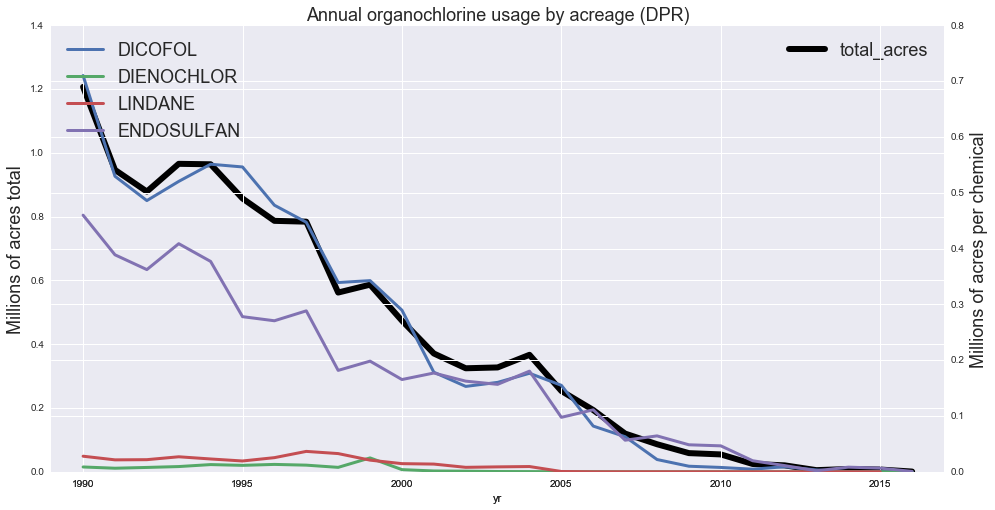

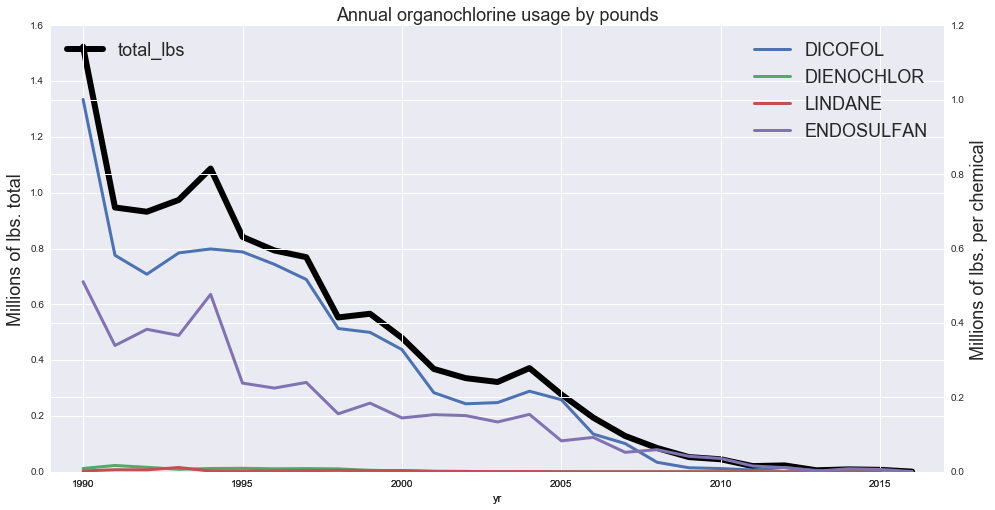

In [4]:
#ORGANOCHLORINES
# e.g. DDT

import math
import matplotlib.pyplot as P
import numpy as np
import sys
import pandas as pd
import seaborn as sns
%matplotlib inline

#create figures
fig1 = P.figure(num=None, figsize=(16, 8), dpi=80, facecolor='w', edgecolor='k')
fig2 = P.figure(num=None, figsize=(16, 8), dpi=80, facecolor='w', edgecolor='k')


# chemical code dictionary
code_D={}
for line in open("chem_key2.txt"):
    i=line.strip().split(';')
    if len(i)==2:
        code_D[i[0]]=i[1]
        


OC_df = pd.read_table("OC_yr_mo.data",delimiter=";")
OC_df.columns = ['yr', 'mo', 'chem','unit',"application#","amounts","total_acres","unit_lbs","applic_#",'amounts2','total_lbs']


total = OC_df.groupby('yr').sum()
total = total.reset_index()
total = total.loc[total['yr']>=1990]
#change units to /Million
total['acre_M'] = total['total_acres']/1000000
total['lbs_M'] = total['total_lbs']/1000000

# subplot 1 populated with acreage data 
ax1 = fig1.add_subplot(111)
total.plot(kind='line',x='yr',y='acre_M', color='k', ax=ax1,lw=6, label="total_acres")

# subplot 2 populated with lb data 
ax3 = fig2.add_subplot(111)
total.plot(kind='line',x='yr',y='lbs_M', color='k', ax=ax3,lw=6, label="total_lbs")

#P.ylabel("lbs total",fontsize=18)

# now, the second axes that shares the x-axis with the ax1
ax2 = fig1.add_subplot(111, sharex=ax1, frameon=False)
ax4 = fig2.add_subplot(111, sharex=ax3, frameon=False)

#Here is a list of the top 4 OC's
keep = [346,468,359,259]
count=0
for chem in keep:
    count+=1
    ochlor=OC_df.loc[OC_df['chem']==chem].groupby('yr').sum()
    ochlor = ochlor.reset_index()
    ochlor = ochlor.loc[ochlor['yr']>=1990]
    ochlor['acre_M'] = ochlor['total_acres']/1000000
    ochlor['lbs_M'] = ochlor['total_lbs']/1000000


    if count>6:
        ochlor.plot(kind='line',x='yr',y='acre_M', ax=ax2,lw=3, linestyle='--',label=code_D[str(chem)])
        ochlor.plot(kind='line',x='yr',y='lbs_M', ax=ax4,lw=3, linestyle='--',label=code_D[str(chem)])

    else:
        ochlor.plot(kind='line',x='yr',y='acre_M', ax=ax2,lw=3, linestyle='-',label=code_D[str(chem)])
        ochlor.plot(kind='line',x='yr',y='lbs_M', ax=ax4,lw=3, linestyle='-',label=code_D[str(chem)])


    
# set labels
ax2.yaxis.tick_right()
ax2.yaxis.set_label_position("right")

ax4.yaxis.tick_right()
ax4.yaxis.set_label_position("right")

ax1.set_title("Annual organochlorine usage by acreage (DPR)",fontsize=18)
ax3.set_title("Annual organochlorine usage by pounds",fontsize=18)
ax1.set_ylabel("Millions of acres total",fontsize=18)
ax2.set_ylabel("Millions of acres per chemical",fontsize=18)
ax3.set_ylabel("Millions of lbs. total",fontsize=18)
ax4.set_ylabel("Millions of lbs. per chemical",fontsize=18)

ax1.set_xlim(1989,2017)
ax3.set_xlim(1989,2017)
ax1.legend(loc=1,fontsize=18)
ax2.legend(loc=2,fontsize=18)
ax3.legend(loc=2,fontsize=18)
ax4.legend(loc=1,fontsize=18)
P.show()